# Case Study

## World bank data

- Data on world economies for over half a century
- Indicators
    - Population
    - Electricity consumption
    - CO2 emissions
    - Literacy rates
    - Unemployment

#### Using zip()

In [1]:
avengers = ['hawkeye', 'iron man', 'thor', 'quicksilver']

names = ['barton', 'stark', 'odinson', 'maximoff'] 

z = zip(avengers, names)    

print(type(z))

print(list(z))

<class 'zip'>
[('hawkeye', 'barton'), ('iron man', 'stark'), ('thor', 'odinson'), ('quicksilver', 'maximoff')]


#### Defining a function

In [12]:
def raise_both(value1, value2):
    """Raise value1 to the power of value2 and vice versa.""" 
    new_value1 = value1 ** value2
    new_value2 = value2 ** value1
    
    new_tuple = (new_value1, new_value2)
    
    return new_tuple

print(raise_both(2,3))

list(raise_both(2,3))[1:]

(8, 9)


[9]

#### Re-cap: list comprehensions

- Basic<br>
    [output expression for iterator variable in iterable]
- Advanced<br>
    [output expression + conditional on output for iterator variable in iterable + conditional on iterable]

### Exercise 1:

In [6]:
# Import pandas
import pandas as pd

# Import Twitter data as DataFrame: df
wb_df = pd.read_csv('datasets/world_ind_pop_data.csv')


feature_names = list(wb_df.columns) # column headers

row_vals = list(wb_df.loc[0]) # first row of the data set

wb_df.head()

,CountryName,CountryCode,Year,Total Population,Urban population (% of total)
0,Arab World,ARB,1960,9.249590e+07,31.285384
1,Caribbean small states,CSS,1960,4.190810e+06,31.597490
2,Central Europe and the Baltics,CEB,1960,9.140158e+07,44.507921
3,East Asia & Pacific (all income levels),EAS,1960,1.042475e+09,22.471132
4,East Asia & Pacific (developing only),EAP,1960,8.964930e+08,16.917679


In [2]:
print(feature_names)
print(row_vals)

['CountryName', 'CountryCode', 'Year', 'Total Population', 'Urban population (% of total)']
['Arab World', 'ARB', 1960, 92495902.0, 31.285384211605397]


In [195]:
# Combine two lists into a dictionary.
# Zip lists: zipped_lists
zipped_lists = zip(feature_names,row_vals) 

# Create a dictionary: rs_dict
rs_dict = dict(zipped_lists)

# Print the dictionary
print(rs_dict)

{'CountryName': 'Arab World', 'Urban population (% of total)': 31.285384211605397, 'Total Population': 92495902.0, 'CountryCode': 'ARB', 'Year': 1960}


In [24]:
# To repeat the same process many times over different lists 
# Create a function that takes two lists and turns them into a dictionary - Define lists2dict()
def lists2dict(list1, list2):
    """Return a dictionary where list1 provides
    the keys and list2 provides the values."""

    # Zip lists: zipped_lists
    zipped_lists = zip(list1, list2)

    # Create a dictionary: rs_dict
    rs_dict = dict(zipped_lists)

    # Return the dictionary
    return rs_dict

# Call lists2dict: rs_fxn
rs_fxn = lists2dict(feature_names,row_vals)

# Print rs_fxn
print(rs_fxn)

{'CountryName': 'Arab World', 'CountryCode': 'ARB', 'Year': 1960, 'Total Population': 92495902.0, 'Urban population (% of total)': 31.285384211605397}


#### Using a list comprehension
This time, you're going to use the lists2dict() function above to turn a bunch of lists into a list of dictionaries with the help of a list comprehension.

In [25]:
#print(wb_df.iterrows())
#print('\n')

row_lists = wb_df.values.tolist()

# print(type(wb_df.values)) # ndarray

print(row_lists[0:10]) # list of rows


[['Arab World', 'ARB', 1960, 92495902.0, 31.285384211605397], ['Caribbean small states', 'CSS', 1960, 4190810.0, 31.5974898513652], ['Central Europe and the Baltics', 'CEB', 1960, 91401583.0, 44.5079211390026], ['East Asia & Pacific (all income levels)', 'EAS', 1960, 1042475394.0, 22.471132204295397], ['East Asia & Pacific (developing only)', 'EAP', 1960, 896492991.0, 16.917678848089302], ['Euro area', 'EMU', 1960, 265396501.0, 62.096946901677505], ['Europe & Central Asia (all income levels)', 'ECS', 1960, 667489033.0, 55.378977445327905], ['Europe & Central Asia (developing only)', 'ECA', 1960, 155317369.0, 38.0661286852531], ['European Union', 'EUU', 1960, 409498462.0, 61.212897757742994], ['Fragile and conflict affected situations', 'FCS', 1960, 120354582.0, 17.891972253143898]]


In [27]:
# Print the first two lists in row_lists
print(row_lists[0])
print(row_lists[1])

# Turn list of lists into list of dicts: list_of_dicts
list_of_dicts = [lists2dict(feature_names,sublist) for sublist in row_lists]

# Print the first two dictionaries in list_of_dicts
print(list_of_dicts[0])
print(list_of_dicts[1])
print(list_of_dicts[2])

['Arab World', 'ARB', 1960, 92495902.0, 31.285384211605397]
['Caribbean small states', 'CSS', 1960, 4190810.0, 31.5974898513652]
{'CountryName': 'Arab World', 'CountryCode': 'ARB', 'Year': 1960, 'Total Population': 92495902.0, 'Urban population (% of total)': 31.285384211605397}
{'CountryName': 'Caribbean small states', 'CountryCode': 'CSS', 'Year': 1960, 'Total Population': 4190810.0, 'Urban population (% of total)': 31.5974898513652}
{'CountryName': 'Central Europe and the Baltics', 'CountryCode': 'CEB', 'Year': 1960, 'Total Population': 91401583.0, 'Urban population (% of total)': 44.5079211390026}


In [29]:
# Turn list of lists into list of dicts: list_of_dicts
list_of_dicts = [lists2dict(feature_names, sublist) for sublist in row_lists]

# Turn list of dicts into a DataFrame: df
df = pd.DataFrame(list_of_dicts)

# Print the head of the DataFrame
df.head()

,CountryName,CountryCode,Year,Total Population,Urban population (% of total)
0,Arab World,ARB,1960,9.249590e+07,31.285384
1,Caribbean small states,CSS,1960,4.190810e+06,31.597490
2,Central Europe and the Baltics,CEB,1960,9.140158e+07,44.507921
3,East Asia & Pacific (all income levels),EAS,1960,1.042475e+09,22.471132
4,East Asia & Pacific (developing only),EAP,1960,8.964930e+08,16.917679


### Using Python generators for streaming data

#### Generators for the large data limit

- Use a generator to load a file line by line
- Works on streaming data!
- Read and process the file until all lines are exhausted

In [14]:
def num_sequence(n):
    """Generate values from 0 to n."""
    i = 0
    while i < n:
        yield i
        i += 1

### Exercise 1: Processing data in chunks (1)

In [30]:
# Open a connection to the file
with open('datasets/world_ind_pop_data.csv') as file:

    # Skip the column names
    file.readline()

    # Initialize an empty dictionary: counts_dict
    counts_dict = {}

    # Process only the first 1000 rows
    for j in range(0, 1000):

        # Split the current line into a list: line
        line = file.readline().split(',')

        # Get the value for the first column: first_col
        first_col = line[0]

        # If the column value is in the dict, increment its value
        if first_col in counts_dict.keys():
            counts_dict[first_col] += 1

        # Else, add to the dict and set value to 1
        else:
            counts_dict[first_col] = 1

# Print the resulting dictionary
print(counts_dict)

{'Arab World': 5, 'Caribbean small states': 5, 'Central Europe and the Baltics': 5, 'East Asia & Pacific (all income levels)': 5, 'East Asia & Pacific (developing only)': 5, 'Euro area': 5, 'Europe & Central Asia (all income levels)': 5, 'Europe & Central Asia (developing only)': 5, 'European Union': 5, 'Fragile and conflict affected situations': 5, 'Heavily indebted poor countries (HIPC)': 5, 'High income': 5, 'High income: nonOECD': 5, 'High income: OECD': 5, 'Latin America & Caribbean (all income levels)': 5, 'Latin America & Caribbean (developing only)': 5, 'Least developed countries: UN classification': 5, 'Low & middle income': 5, 'Low income': 5, 'Lower middle income': 5, 'Middle East & North Africa (all income levels)': 5, 'Middle East & North Africa (developing only)': 5, 'Middle income': 5, 'North America': 5, 'OECD members': 5, 'Other small states': 5, 'Pacific island small states': 5, 'Small states': 5, 'South Asia': 5, 'Sub-Saharan Africa (all income levels)': 5, 'Sub-Saha

### Exercise 2: Writing a generator to load data in chunks (2)

In [40]:
# Define read_large_file()
def read_large_file(file_object):
    """A generator function to read a large file lazily."""

    # Loop indefinitely until the end of the file
    while True:

        # Read a line from the file: data
        data = file_object.readline()

        # Break if this is the end of the file
        if not data:
            break

        # Yield the line of data
        else:
            yield data
        
# Open a connection to the file
with open('datasets/world_ind_pop_data.csv') as file:

    # Create a generator object for the file: gen_file
    gen_file = read_large_file(file)

    # Print the first three lines of the file
    print(next(gen_file))
    print(next(gen_file))
    print(next(gen_file))
    print(next(gen_file))


CountryName,CountryCode,Year,Total Population,Urban population (% of total)

Arab World,ARB,1960,92495902.0,31.285384211605397

Caribbean small states,CSS,1960,4190810.0,31.5974898513652

Central Europe and the Baltics,CEB,1960,91401583.0,44.5079211390026



### Exercise 3: Writing a generator to load data in chunks (3)

In [42]:
# Initialize an empty dictionary: counts_dict
counts_dict = {}

# Open a connection to the file
with open('datasets/world_ind_pop_data.csv') as file:
    
    # Skip the column names
    file.readline()
    
    # Iterate over the generator from read_large_file() function above
    for line in read_large_file(file):

        row = line.split(',')
        first_col = row[0]

        if first_col in counts_dict.keys():
            counts_dict[first_col] += 1
        else:
            counts_dict[first_col] = 1

# Print            
print(counts_dict)


{'Arab World': 55, 'Caribbean small states': 55, 'Central Europe and the Baltics': 55, 'East Asia & Pacific (all income levels)': 55, 'East Asia & Pacific (developing only)': 55, 'Euro area': 55, 'Europe & Central Asia (all income levels)': 55, 'Europe & Central Asia (developing only)': 55, 'European Union': 55, 'Fragile and conflict affected situations': 55, 'Heavily indebted poor countries (HIPC)': 55, 'High income': 55, 'High income: nonOECD': 55, 'High income: OECD': 55, 'Latin America & Caribbean (all income levels)': 55, 'Latin America & Caribbean (developing only)': 55, 'Least developed countries: UN classification': 55, 'Low & middle income': 55, 'Low income': 55, 'Lower middle income': 55, 'Middle East & North Africa (all income levels)': 55, 'Middle East & North Africa (developing only)': 55, 'Middle income': 55, 'North America': 55, 'OECD members': 55, 'Other small states': 55, 'Pacific island small states': 55, 'Small states': 55, 'South Asia': 55, 'Sub-Saharan Africa (all 

### Using iterators for streaming data

#### Reading files in chunks

- read_csv() function and chunksize argument
- Look at specific indicators in specific countries
- Write a function to generalize tasks

### Exercise 1: Writing an iterator to load data in chunks (1) - using pandas read_csv and chunksize

In [3]:
# Import the pandas package
import pandas as pd

# Initialize reader object: df_reader
df_reader = pd.read_csv('datasets/world_ind_pop_data.csv', chunksize=10) # This creates an iterable reader object

# Print two chunks
print(next(df_reader))
print(next(df_reader))

                                 CountryName CountryCode  Year  \
0                                 Arab World         ARB  1960   
1                     Caribbean small states         CSS  1960   
2             Central Europe and the Baltics         CEB  1960   
3    East Asia & Pacific (all income levels)         EAS  1960   
4      East Asia & Pacific (developing only)         EAP  1960   
5                                  Euro area         EMU  1960   
6  Europe & Central Asia (all income levels)         ECS  1960   
7    Europe & Central Asia (developing only)         ECA  1960   
8                             European Union         EUU  1960   
9   Fragile and conflict affected situations         FCS  1960   

   Total Population  Urban population (% of total)  
0      9.249590e+07                      31.285384  
1      4.190810e+06                      31.597490  
2      9.140158e+07                      44.507921  
3      1.042475e+09                      22.471132  
4      8

### Exercise 2: Writing an iterator to load data in chunks (2) - Bring Two Columns, chunksize=1000

In [50]:
# Initialize reader object: urb_pop_reader
urb_pop_reader = pd.read_csv('datasets/world_ind_pop_data.csv', chunksize=1000)

# Get the first DataFrame chunk: df_urb_pop
df_urb_pop = next(urb_pop_reader)

# Check out the head of the DataFrame
print(df_urb_pop.head())
print('\n')

# Check out specific country: df_pop_ceb
df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode']=='CEB']
print(df_pop_ceb)
print('\n')

# Zip DataFrame columns of interest: pops
pops = zip(df_pop_ceb['Total Population'], df_pop_ceb['Urban population (% of total)'])

# Turn zip object into list: pops_list
pops_list = list(pops)

# Print pops_list
print(pops_list)

                               CountryName CountryCode  Year  \
0                               Arab World         ARB  1960   
1                   Caribbean small states         CSS  1960   
2           Central Europe and the Baltics         CEB  1960   
3  East Asia & Pacific (all income levels)         EAS  1960   
4    East Asia & Pacific (developing only)         EAP  1960   

   Total Population  Urban population (% of total)  
0      9.249590e+07                      31.285384  
1      4.190810e+06                      31.597490  
2      9.140158e+07                      44.507921  
3      1.042475e+09                      22.471132  
4      8.964930e+08                      16.917679  


                        CountryName CountryCode  Year  Total Population  \
2    Central Europe and the Baltics         CEB  1960        91401583.0   
244  Central Europe and the Baltics         CEB  1961        92237118.0   
486  Central Europe and the Baltics         CEB  1962        93014890.

### Exercise 3: Writing an iterator to load data in chunks (3) - New Column w/ Chunksize: 1000

2      91401583.0
244    92237118.0
486    93014890.0
728    93845749.0
970    94722599.0
Name: Total Population, dtype: float64
2      40680944
244    41697325
486    42662734
728    43670267
970    44717348
Name: Total Urban Population, dtype: int64


C:\Users\sefi\miniconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


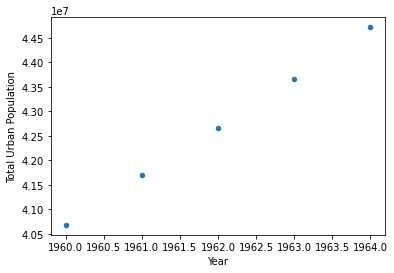

In [9]:
# Initialize reader object: urb_pop_reader
urb_pop_reader = pd.read_csv('datasets/world_ind_pop_data.csv', chunksize=1000)

# Get the first DataFrame chunk: df_urb_pop
df_urb_pop = next(urb_pop_reader)

# Check out specific country: df_pop_ceb
df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode'] == 'CEB']

# Zip DataFrame columns of interest: pops
pops = zip(df_pop_ceb['Total Population'], 
            df_pop_ceb['Urban population (% of total)'])

# Turn zip object into list: pops_list
pops_list = list(pops)
print(df_pop_ceb['Total Population'])

# Use list comprehension to create new DataFrame column 'Total Urban Population' (Calculation)
# df_pop_ceb['Total Urban Population'] = [int(tup[0]*tup[1]*0.01) for tup in pops_list] # will work in py3
# df_pop_ceb.loc[('Total Urban Population')] = [int(tup[0]*tup[1]*0.01) for tup in pops_list] #better
# Try using .loc[row_indexer,col_indexer] = value instead - A value is trying to be set on a copy of a slice from a DFrame. 

df_pop_ceb['Total Urban Population'] = [int(tup[0]*tup[1]*0.01) for tup in pops_list]
print(df_pop_ceb['Total Urban Population'])


# Plot urban population data
import matplotlib.pyplot as plt

df_pop_ceb.plot(kind='scatter', x='Year', y='Total Urban Population')
plt.show()


### Exercise 4: Writing an iterator to load data in chunks (4) - Entire Dataset

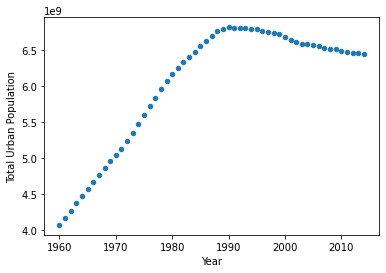

In [13]:
# Initialize reader object: urb_pop_reader
urb_pop_reader = pd.read_csv('datasets/world_ind_pop_data.csv', chunksize=1000)

# Initialize empty DataFrame: data
data = pd.DataFrame()

# Iterate over each DataFrame chunk
for df_urb_pop in urb_pop_reader:

    # Check out specific country: df_pop_ceb
    df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode'] == 'CEB']

    # Zip DataFrame columns of interest: pops
    pops = zip(df_pop_ceb['Total Population'],
                df_pop_ceb['Urban population (% of total)'])

    # Turn zip object into list: pops_list
    pops_list = list(pops)

    # Use list comprehension to create new DataFrame column 'Total Urban Population'
    #df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1]) for tup in pops_list] #will work inpy3
    df_pop_ceb.loc[:,('Total Urban Population')] = [int(tup[0] * tup[1]) for tup in pops_list]
    
    # Append DataFrame chunk to data: data
    data = data.append(df_pop_ceb)

# Plot urban population data
data.plot(kind='scatter', x='Year', y='Total Urban Population')
plt.show()


### Exercise 5: Writing an iterator to load data in chunks (5) 
- Put all the code for processing the data into a single function so that you can reuse the code without having to rewrite the same things all over again.

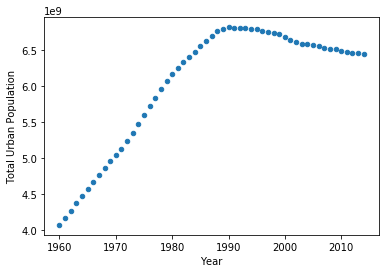

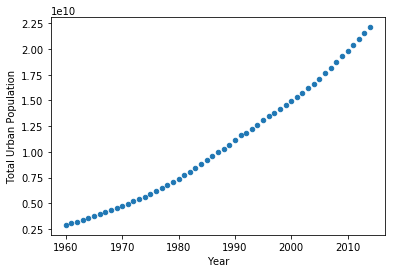

In [38]:
# Define plot_pop()
def plot_pop(filename, country_code):

    # Initialize reader object: urb_pop_reader
    urb_pop_reader = pd.read_csv(filename, chunksize=1000)

    # Initialize empty DataFrame: data
    data = pd.DataFrame()
    
    # Iterate over each DataFrame chunk
    for df_urb_pop in urb_pop_reader:
        # Check out specific country: df_pop_ceb
        df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode'] == country_code]

        # Zip DataFrame columns of interest: pops
        pops = zip(df_pop_ceb['Total Population'],
                    df_pop_ceb['Urban population (% of total)'])

        # Turn zip object into list: pops_list
        pops_list = list(pops)

        # Use list comprehension to create new DataFrame column 'Total Urban Population'
        #df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1]) for tup in pops_list] #doesnt work
        df_pop_ceb.loc[:,('Total Urban Population')] = [int(tup[0] * tup[1]) for tup in pops_list]
    
        # Append DataFrame chunk to data: data
        data = data.append(df_pop_ceb)

    # Plot urban population data
    data.plot(kind='scatter', x='Year', y='Total Urban Population')
    plt.show()

# Set the filename: fn
fn = 'datasets/world_ind_pop_data.csv'

# Call plot_pop for country code 'CEB'
plot_pop(fn, 'CEB')

# Call plot_pop for country code 'ARB'
plot_pop(fn, 'ARB')
